# GPU vs. CPU using numba

In [6]:
import cv2
import numpy as np
from numba import vectorize
from matplotlib import pyplot as plt

In [2]:
# Cpu version
def vector_add_cpu(a, b, num_elements):
    c = np.zeros( num_elements, dtype=np.float32 )
    for i in range( num_elements ):
        c[i] = a[i] + b[i]
    return c

# Gpu version
@vectorize(["float32(float32, float32)"], target='cuda')
def vector_add_gpu(a, b):
    return a + b

In [13]:
list_cpu = []
list_gpu = []

def test(num_elements):
    a_src = np.ones(num_elements, dtype=np.float32)
    b_src = np.ones(num_elements, dtype=np.float32)

    # Time cpu
    t0 = cv2.getTickCount()
    vector_add_cpu(a_src, b_src, num_elements)
    t1 = cv2.getTickCount()
    list_cpu.append([t1-t0, 1000.0 * (t1-t0)/cv2.getTickFrequency()])

    # Time gpu
    t0 = cv2.getTickCount()
    vector_add_gpu(a_src, b_src)
    t1 = cv2.getTickCount()
    list_gpu.append([t1-t0, 1000.0 * (t1 - t0) / cv2.getTickFrequency()])

for i in range(100, 100000, 10):
    test(i)

### Clock-cycles

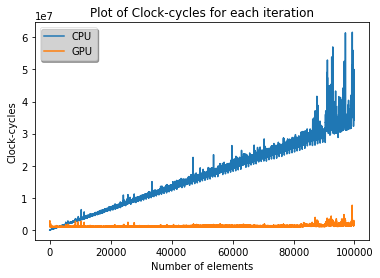

In [14]:
plt.figure(1)
plt.title('Plot of Clock-cycles for each iteration')

# cpu
i = 0; x_cpu = []; y_cpu = []
for l in list_cpu:
    x_cpu.append(i); i += 10
    y_cpu.append(l[0])
plt.plot(x_cpu, y_cpu, label='CPU')

# gpu
i = 0; x_gpu = []; y_gpu = []
for l in list_gpu:
    x_gpu.append(i); i += 10
    y_gpu.append(l[0])
plt.plot(x_gpu, y_gpu, label='GPU')

plt.xlabel('Number of elements')
plt.ylabel('Clock-cycles')
leg = plt.legend(loc='best', ncol=1, shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)

plt.show()

### Time

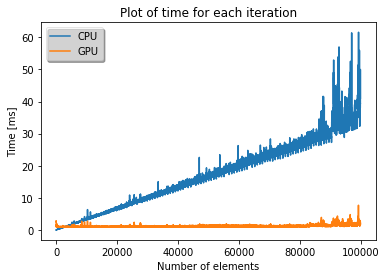

In [15]:
plt.figure(2)
plt.title('Plot of time for each iteration')

# cpu
i = 0; x_cpu.clear(); y_cpu.clear()
for l in list_cpu:
    x_cpu.append(i); i += 10
    y_cpu.append(l[1])
plt.plot(x_cpu, y_cpu, label='CPU')

# gpu
i = 0; x_gpu.clear(); y_gpu.clear()
for l in list_gpu:
    x_gpu.append(i); i += 10
    y_gpu.append(l[1])
plt.plot(x_gpu, y_gpu, label='GPU')

plt.xlabel('Number of elements')
plt.ylabel('Time [ms]')
leg = plt.legend(loc='best', ncol=1, shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)

plt.show()